In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as patches

In [ ]:
#Cargo archivos csv en dataframes
events = pd.read_csv('/content/drive/MyDrive/Master en Big Data Deportivo/PFM/Archivos BePro Mundial 2022/event_data_qatar2022.csv',
                     encoding='utf-8',
                     low_memory=False)

formations = pd.read_csv('/content/drive/MyDrive/Master en Big Data Deportivo/PFM/Archivos BePro Mundial 2022/formations_qatar2022.csv')

lineups = pd.read_csv('/content/drive/MyDrive/Master en Big Data Deportivo/PFM/Archivos BePro Mundial 2022/lineup_qatar2022.csv')

matches = pd.read_csv('/content/drive/MyDrive/Master en Big Data Deportivo/PFM/Archivos BePro Mundial 2022/matches_qatar2022.csv')

pass_matrix = pd.read_csv('/content/drive/MyDrive/Master en Big Data Deportivo/PFM/Archivos BePro Mundial 2022/pass_matrix_qatar2022.csv')

playerstats = pd.read_csv('/content/drive/MyDrive/Master en Big Data Deportivo/PFM/Archivos BePro Mundial 2022/player_stats_qatar2022.csv')

sequence_data = pd.read_csv('/content/drive/MyDrive/Master en Big Data Deportivo/PFM/Archivos BePro Mundial 2022/sequence_data_qatar2022.csv')

players = pd.read_csv('/content/drive/MyDrive/Master en Big Data Deportivo/PFM/Archivos BePro Mundial 2022/team_players_qatar2022.csv')

teams = pd.read_csv('/content/drive/MyDrive/Master en Big Data Deportivo/PFM/Archivos BePro Mundial 2022/teams_qatar2022.csv')

teams_stats = pd.read_csv('/content/drive/MyDrive/Master en Big Data Deportivo/PFM/Archivos BePro Mundial 2022/team_stats_qatar2022.csv')



In [ ]:
# Lista de dataframes y sus nombres
dataframes = {
    "events": events,
    "formations": formations,
    "lineups": lineups,
    "matches": matches,
    "pass_matrix": pass_matrix,
    "playerstats": playerstats,
    "sequence_data": sequence_data,
    "players": players,
    "teams": teams,
    "teams_stats": teams_stats
}

# Iterar sobre cada DataFrame en el diccionario y mostrar su información
for name, df in dataframes.items():
    print(f"\n=== Información del DataFrame: {name} ===")
    print(df.info())



=== Información del DataFrame: events ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146137 entries, 0 to 146136
Data columns (total 35 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                146137 non-null  int64  
 1   event_id                  146137 non-null  int64  
 2   match_id                  146137 non-null  int64  
 3   team_id                   146137 non-null  int64  
 4   player_id                 146137 non-null  int64  
 5   event_period              146137 non-null  object 
 6   event_time                146137 non-null  int64  
 7   x                         146137 non-null  float64
 8   y                         146137 non-null  float64
 9   relative_event.id         146137 non-null  int64  
 10  eventType                 137611 non-null  object 
 11  outcome                   75752 non-null   object 
 12  subEventType              10410 non-null   object 
 13  c

In [ ]:
# Revisar duplicados, valores nulos y número total de filas
for name, df in dataframes.items():
    print(f"\n🔍 Analizando {name}...")

    # Número total de filas
    total_filas = df.shape[0]
    print(f"🔢 Total de filas en {name}: {total_filas}")

    # Contar duplicados
    duplicados = df.duplicated().sum()
    print(f"👉 Duplicados en {name}: {duplicados}")

    # Contar valores nulos
    missing_values = df.isnull().sum()
    missing_values = missing_values[missing_values > 0]
    if not missing_values.empty:
        print(f"❌ Valores nulos en {name}:\n{missing_values}")
    else:
        print(f"✅ No hay valores nulos en {name}")


🔍 Analizando events...
🔢 Total de filas en events: 146137
👉 Duplicados en events: 0
❌ Valores nulos en events:
eventType                  8526
outcome                   70385
subEventType             135727
cross                     82284
keyPass                   82284
assist                    82284
bodyPart                 144450
ball_position_x          145062
ball_position_y          145062
xg                       144769
team_name                  8527
team_iso_country_code      8527
main_position              8846
back_number                8527
player_name                8527
player_last_name          13290
dtype: int64

🔍 Analizando formations...
🔢 Total de filas en formations: 6035
👉 Duplicados en formations: 0
❌ Valores nulos en formations:
main_position        17
player_last_name    186
dtype: int64

🔍 Analizando lineups...
🔢 Total de filas en lineups: 3249
👉 Duplicados en lineups: 0
❌ Valores nulos en lineups:
position_name       1254
player_last_name      90
position.x  

In [ ]:

# Eliminar filas en 'events' donde 'eventType' es nulo
print("Filas originales en events:", events.shape[0])
events = events.dropna(subset=['eventType'])
print("Filas en events después de eliminar filas con eventType nulo:", events.shape[0])

###

# Lista de columnas a eliminar en cualquiera de los dataframes
columns_to_remove = [
    "season.id",
    "season.name",
    "season.season_group_name",
    "season.league_id",
    "live_analysing",
    "is_analysis_finished"
]


# Eliminar columnas completamente vacías y las específicas en cada DataFrame
for name, df in dataframes.items():
    original_columns = df.shape[1]
    # Eliminar columnas que estén totalmente vacías
    df = df.dropna(axis=1, how='all')
    # Eliminar columnas específicas si existen
    df = df.drop(columns=columns_to_remove, errors='ignore')
    dataframes[name] = df
    print(f"\n🔍 {name}: Columnas originales: {original_columns} -> Después: {df.shape[1]}")


# Actualizar variables individuales
events       = dataframes["events"]
formations   = dataframes["formations"]
lineups      = dataframes["lineups"]
matches      = dataframes["matches"]
pass_matrix  = dataframes["pass_matrix"]
playerstats  = dataframes["playerstats"]
sequence_data= dataframes["sequence_data"]
players      = dataframes["players"]
teams        = dataframes["teams"]
teams_stats  = dataframes["teams_stats"]

# Mostrar resumen final de valores nulos restantes en cada tabla
print("\n✅ Limpieza final: Valores nulos restantes en cada tabla")
for name, df in dataframes.items():
    total_nulls = df.isnull().sum().sum()
    print(f"{name}: {total_nulls} valores nulos restantes.")



Filas originales en events: 146137
Filas en events después de eliminar filas con eventType nulo: 137611

🔍 events: Columnas originales: 35 -> Después: 31

🔍 formations: Columnas originales: 24 -> Después: 20

🔍 lineups: Columnas originales: 12 -> Después: 12

🔍 matches: Columnas originales: 25 -> Después: 17

🔍 pass_matrix: Columnas originales: 38 -> Después: 33

🔍 playerstats: Columnas originales: 82 -> Después: 78

🔍 sequence_data: Columnas originales: 7 -> Después: 7

🔍 players: Columnas originales: 10 -> Después: 9

🔍 teams: Columnas originales: 6 -> Después: 6

🔍 teams_stats: Columnas originales: 76 -> Después: 72

✅ Limpieza final: Valores nulos restantes en cada tabla
events: 1097077 valores nulos restantes.
formations: 203 valores nulos restantes.
lineups: 5026 valores nulos restantes.
matches: 0 valores nulos restantes.
pass_matrix: 30199 valores nulos restantes.
playerstats: 67 valores nulos restantes.
sequence_data: 10748 valores nulos restantes.
players: 152 valores nulos r

In [ ]:
def convert_series_ms_to_mmss(ms_series):
    """
    Convierte una Serie de milisegundos a formato "MM:SS" (como string).

    Parámetros:
    - ms_series: pd.Series con valores en milisegundos.

    Retorna:
    - pd.Series con los valores convertidos a "MM:SS" en formato texto (string).
    """
    # Convertir a numérico y manejar posibles valores erróneos
    ms_series = pd.to_numeric(ms_series, errors="coerce").fillna(0).astype(int)

    # Calcular minutos y segundos
    minutes = ms_series // 60000
    seconds = (ms_series % 60000) // 1000

    # Devolver el formato MM:SS como texto
    return minutes.astype(str) + ":" + seconds.astype(str).str.zfill(2)

# Aplicar la conversión en las tablas y columnas correctas asegurando tipo str

# Events: convertir 'event_time'
if "event_time" in events.columns:
    events["event_time"] = convert_series_ms_to_mmss(events["event_time"]).astype(str)

# Formations: convertir 'changed_time'
if "changed_time" in formations.columns:
    formations["changed_time"] = convert_series_ms_to_mmss(formations["changed_time"]).astype(str)

# Pass Matrix: convertir 'event_time'
if "event_time" in pass_matrix.columns:
    pass_matrix["event_time"] = convert_series_ms_to_mmss(pass_matrix["event_time"]).astype(str)

# Sequence Data: convertir 'start_time' y 'end_time'
if "start_time" in sequence_data.columns:
    sequence_data["start_time"] = convert_series_ms_to_mmss(sequence_data["start_time"]).astype(str)

if "end_time" in sequence_data.columns:
    sequence_data["end_time"] = convert_series_ms_to_mmss(sequence_data["end_time"]).astype(str)

# Verificar que la conversión se realizó correctamente
print("Sample de events:")
print(events.dtypes)
print(events.head())

print("\nSample de formations:")
print(formations.dtypes)
print(formations.head())

print("\nSample de pass_matrix:")
print(pass_matrix.dtypes)
print(pass_matrix.head())

print("\nSample de sequence_data:")
print(sequence_data.dtypes)
print(sequence_data.head())


Sample de events:
Unnamed: 0                 int64
event_id                   int64
match_id                   int64
team_id                    int64
player_id                  int64
event_period              object
event_time                object
x                        float64
y                        float64
relative_event.id          int64
eventType                 object
outcome                   object
subEventType              object
cross                     object
keyPass                   object
assist                    object
bodyPart                  object
ball_position_x          float64
ball_position_y          float64
xg                       float64
team_name                 object
team_iso_country_code     object
round.id                   int64
round.name                object
fecha                     object
hora                      object
description_match         object
main_position             object
back_number              float64
player_name              

In [ ]:
# Creamos columnas de full name y relative full name para juntar el nombre y apellido de los jugadores

# Lista de columnas a eliminar (originales)
cols_to_drop = [
    "player_name", "player_last_name",
    "player_relative_player_name", "player_relative_last_name"
]

# Recorrer cada DataFrame en el diccionario
for df_name, df in dataframes.items():
    # Si existen las columnas para el nombre completo, se crean:
    if "player_name" in df.columns and "player_last_name" in df.columns:
        df["full_name"] = (
            df["player_name"].fillna("").astype(str).str.strip() + " " +
            df["player_last_name"].fillna("").astype(str).str.strip()
        ).str.strip()

    # Para la versión relativa:
    if "player_relative_player_name" in df.columns and "player_relative_last_name" in df.columns:
        df["player_relative_full_name"] = (
            df["player_relative_player_name"].fillna("").astype(str).str.strip() + " " +
            df["player_relative_last_name"].fillna("").astype(str).str.strip()
        ).str.strip()

    # Eliminar las columnas originales si existen
    df.drop(columns=[col for col in cols_to_drop if col in df.columns], inplace=True)

    # Actualizar el DataFrame en el diccionario
    dataframes[df_name] = df

# Actualizar las variables originales usando el diccionario:
events = dataframes["events"]
formations = dataframes["formations"]
lineups = dataframes["lineups"]
matches = dataframes["matches"]
pass_matrix = dataframes["pass_matrix"]
playerstats = dataframes["playerstats"]
sequence_data = dataframes["sequence_data"]
players = dataframes["players"]
teams = dataframes["teams"]
teams_stats = dataframes["teams_stats"]

print("Se han creado las columnas 'full_name' y 'player_relative_full_name', y se han eliminado las columnas originales correspondientes.")


Se han creado las columnas 'full_name' y 'player_relative_full_name', y se han eliminado las columnas originales correspondientes.


In [ ]:
# Eliminar decimales en back_number

# Lista de DataFrames a recorrer. Ajusta esta lista según las variables que tengas definidas.
dataframes = [events, formations, lineups, pass_matrix, playerstats, sequence_data, players, teams]

for df in dataframes:
    if 'back_number' in df.columns:
        # Convertir la columna 'back_number' a entero si el valor no es nulo,
        # eliminando así los decimales.
        df['back_number'] = df['back_number'].apply(lambda x: int(x) if pd.notnull(x) else x)

# Verifica el resultado (por ejemplo, en el DataFrame 'formations')
print(formations[['back_number']].head())


   back_number
0           19
1           17
2            7
3            8
4            4


In [ ]:
# Convertir la columna 'xg' a texto, respetando los valores originales
events['xg'] = events['xg'].astype(str)


In [ ]:
# Convertimos coordenadas de bepro a metros reales

def is_x_coordinate(col: str) -> bool:
    """
    Determina si el nombre de la columna representa una coordenada en X.
    Considera las columnas que sean igual a "x", o que empiecen por "x_",
    o que terminen con "_x" o con ".x".
    """
    return col == 'x' or col.startswith('x_') or col.endswith('_x') or col.endswith('.x')

def is_y_coordinate(col: str) -> bool:
    """
    Determina si el nombre de la columna representa una coordenada en Y.
    Considera las columnas que sean igual a "y", o que empiecen por "y_",
    o que terminen con "_y" o con ".y".
    """
    return col == 'y' or col.startswith('y_') or col.endswith('_y') or col.endswith('.y')

def convert_bepro_to_real_field_inplace(
    df: pd.DataFrame,
    cols: list,
    scale_x: float = 68,
    scale_y: float = 105
) -> pd.DataFrame:
    """
    Convierte las columnas de coordenadas BEPRO (valores entre 0 y 1)
    a coordenadas reales en metros, modificando las columnas originales.

    Parámetros:
      df      : DataFrame a modificar.
      cols    : Lista de nombres de columnas a revisar.
      scale_x : Factor de escala para coordenadas en X (por defecto 68, ancho real).
      scale_y : Factor de escala para coordenadas en Y (por defecto 105, largo real).

    Retorna:
      El DataFrame modificado con las columnas actualizadas.
    """
    for col in cols:
        if col in df.columns:
            # Solo modificamos si la columna tiene datos numéricos
            if not pd.api.types.is_numeric_dtype(df[col]):
                continue
            if is_x_coordinate(col):
                df[col] = df[col] * scale_x
            elif is_y_coordinate(col):
                df[col] = df[col] * scale_y
    return df

# Lista de DataFrames sobre los que se aplicará la conversión.
dataframes = [events, formations, lineups, pass_matrix, playerstats, sequence_data]

# Lista de columnas con coordenadas de BEPRO
coord_columns = [
    'x', 'y',
    'ball_position_x', 'ball_position_y',
    'x_start', 'y_start',
    'x_end', 'y_end',
    'position.x', 'position.y'
]

# Aplicar la conversión en cada DataFrame (se modifican las columnas originales)
for df in dataframes:
    convert_bepro_to_real_field_inplace(df, coord_columns, scale_x=68, scale_y=105)

# Verifica el resultado (por ejemplo, en los DataFrames "events" y "pass_matrix")
print(events[['x', 'y']].head())
print(pass_matrix[['x_start', 'y_start', 'x_end', 'y_end']].head())


           x          y
0  33.392284  52.498740
1  42.799812  31.587150
2  48.296864  21.931665
3  36.119424  10.387619
4  33.392284   8.691312
     x_start    y_start      x_end      y_end
0  33.392284  52.498740  42.799812  31.587150
1  48.296864  21.931665  36.119424  10.387619
2  33.392284   8.691312   6.664857  16.017960
3   7.320200  17.239110  16.270360   5.485893
4  18.755352   4.264785  29.840032   4.722701


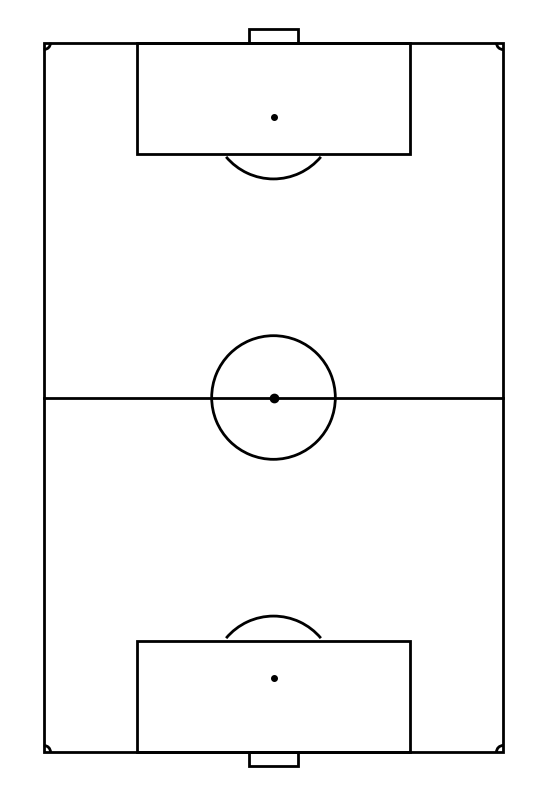

In [ ]:
def pitch_plot():
    field_width = 68    # Ancho del campo (metros)
    field_length = 105  # Largo del campo (metros)
    goal_depth = 2      # Profundidad del arco (sale hacia afuera)
    goal_width = 7.32   # Ancho del arco

    fig, ax = plt.subplots(figsize=(field_width/10, field_length/10))

    # Contorno del campo
    pitch = patches.Rectangle((0, 0), field_width, field_length,
                              edgecolor="black", facecolor="none", lw=2)
    ax.add_patch(pitch)

    # Línea de medio campo
    ax.plot([0, field_width], [field_length/2, field_length/2],
            color="black", lw=2)

    # Círculo central
    center_circle = patches.Arc((field_width/2, field_length/2),
                                2*9.15, 2*9.15,
                                angle=0, theta1=0, theta2=360,
                                color="black", lw=2)
    ax.add_patch(center_circle)
    ax.plot(field_width/2, field_length/2, marker='o', color="black")

    # Áreas de penal
    PENALTY_AREA_X = 0.2035  # Margen lateral normalizado
    PENALTY_AREA_Y = 0.843   # Límite vertical normalizado

    # Conversión a coordenadas reales
    pa_x1 = PENALTY_AREA_X * field_width
    pa_x2 = (1 - PENALTY_AREA_X) * field_width
    opponent_pa_y = PENALTY_AREA_Y * field_length
    own_pa_y = (1 - PENALTY_AREA_Y) * field_length

    # Dibujar las áreas de penal
    ax.add_patch(patches.Rectangle((pa_x1, opponent_pa_y),
                                   pa_x2 - pa_x1,
                                   field_length - opponent_pa_y,
                                   edgecolor="black", facecolor="none", lw=2))
    ax.add_patch(patches.Rectangle((pa_x1, 0),
                                   pa_x2 - pa_x1,
                                   own_pa_y,
                                   edgecolor="black", facecolor="none", lw=2))

    # Puntos de penal, con tamaño reducido (markersize=4)
    ax.plot(field_width/2, field_length - 11, marker='o',
            color="black", markersize=4)
    ax.plot(field_width/2, 11, marker='o',
            color="black", markersize=4)

    # Arcos del área de penal ("la D")
    ax.add_patch(patches.Arc((field_width/2, field_length - 11),
                             2*9.15, 2*9.15,
                             angle=0, theta1=220, theta2=320,
                             color="black", lw=2))
    ax.add_patch(patches.Arc((field_width/2, 11),
                             2*9.15, 2*9.15,
                             angle=0, theta1=40, theta2=140,
                             color="black", lw=2))

    # Arcos de esquina
    corner_radius = 1
    ax.add_patch(patches.Arc((0, 0), corner_radius*2, corner_radius*2,
                             angle=0, theta1=0, theta2=90,
                             color="black", lw=2))
    ax.add_patch(patches.Arc((field_width, 0), corner_radius*2, corner_radius*2,
                             angle=0, theta1=90, theta2=180,
                             color="black", lw=2))
    ax.add_patch(patches.Arc((0, field_length), corner_radius*2, corner_radius*2,
                             angle=0, theta1=270, theta2=360,
                             color="black", lw=2))
    ax.add_patch(patches.Arc((field_width, field_length), corner_radius*2, corner_radius*2,
                             angle=0, theta1=180, theta2=270,
                             color="black", lw=2))

    # Postes de los arcos como rectángulos (porterías)
    goal_x1 = (field_width - goal_width) / 2
    # Arco superior
    ax.add_patch(patches.Rectangle((goal_x1, field_length),
                                   goal_width, goal_depth,
                                   edgecolor="black", facecolor="none", lw=2))
    # Arco inferior
    ax.add_patch(patches.Rectangle((goal_x1, -goal_depth),
                                   goal_width, goal_depth,
                                   edgecolor="black", facecolor="none", lw=2))

    ax.set_xlim(-5, field_width+5)
    ax.set_ylim(-5, field_length+5)
    ax.set_aspect('equal')
    plt.axis("off")
    return fig, ax

# Prueba de la función para dibujar el campo
fig, ax = pitch_plot()
plt.show()


In [ ]:
# Definimos una función para visualizar mapas de calor por jugador

def plot_player_heatmap(player_id, events):
    """
    Grafica un mapa de calor sobre el campo para el jugador indicado.

    Parámetros:
      player_id : Identificador del jugador (por ejemplo, 328433 para Tagliafico).
      events : DataFrame con los eventos del partido.
    """
    # Filtrar los eventos del jugador
    player_events = events[events['player_id'] == player_id]

    # Obtener el nombre completo del jugador
    full_name = player_events['full_name'].iloc[0]  # Asumiendo que hay al menos un evento para el jugador

    # Llamar a la función pitch_plot para dibujar el campo
    fig, ax = pitch_plot()

    # Graficar el mapa de calor usando Seaborn (usamos las columnas "x" y "y" ya convertidas)
    sns.kdeplot(
        data=player_events,
        x="x",
        y="y",
        fill=True,
        cmap="OrRd",
        alpha=0.6,
        levels=100,
        ax=ax
    )

    # Usar el full_name extraído en el título del gráfico
    ax.set_title(f"Mapa de Calor - {full_name}", fontsize=14)
    plt.show()

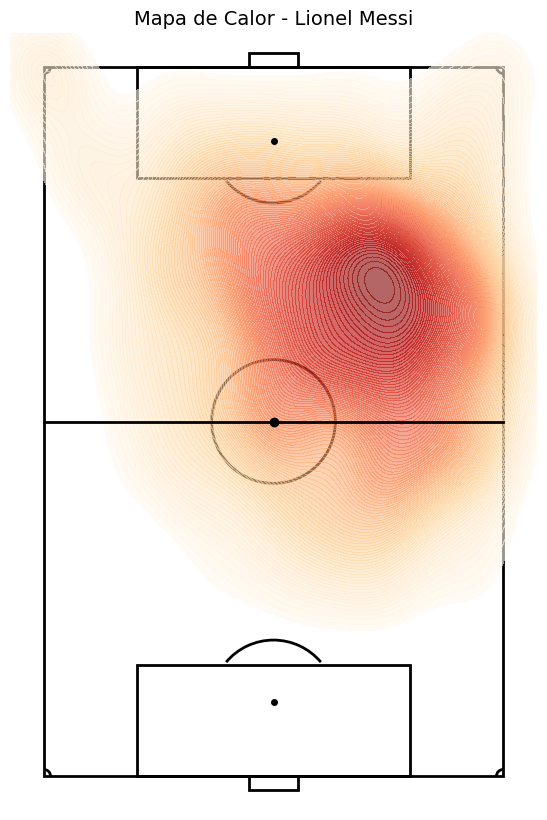

In [ ]:
plot_player_heatmap(328442, events)

In [ ]:
def plot_individual_team_pass_origin_heatmap(team_id, events):
    """
    Grafica un mapa de calor sobre el campo basado en el origen de los pases completados.

    Parámetros:
      team_id : Identificador del equipo.
      events : DataFrame con los eventos del partido.
    """
    # Filtrar los eventos del equipo y pases completados
    team_events = events[
        (events['team_id'] == team_id) &
        (events['eventType'] == "Pass") &
        (events['outcome'] == "Successful")
    ]

    # Obtener el nombre del equipo desde el DataFrame 'events'
    team_name = events.loc[events['team_id'] == team_id, 'team_name'].iloc[0]  # Asumiendo que hay al menos un evento para el equipo

    # Llamar a la función pitch_plot para dibujar el campo
    fig, ax = pitch_plot()

    # Graficar el mapa de calor usando las coordenadas 'x' y 'y'
    sns.kdeplot(
        data=team_events,
        x="x",
        y="y",
        fill=True,
        cmap="Blues",
        alpha=0.6,
        levels=100,
        ax=ax
    )

    # Configurar el título con el nombre del equipo (usando la variable team_name)
    ax.set_title(f"Mapa de Calor - Pases Completados De {team_name}", fontsize=14)
    plt.show()

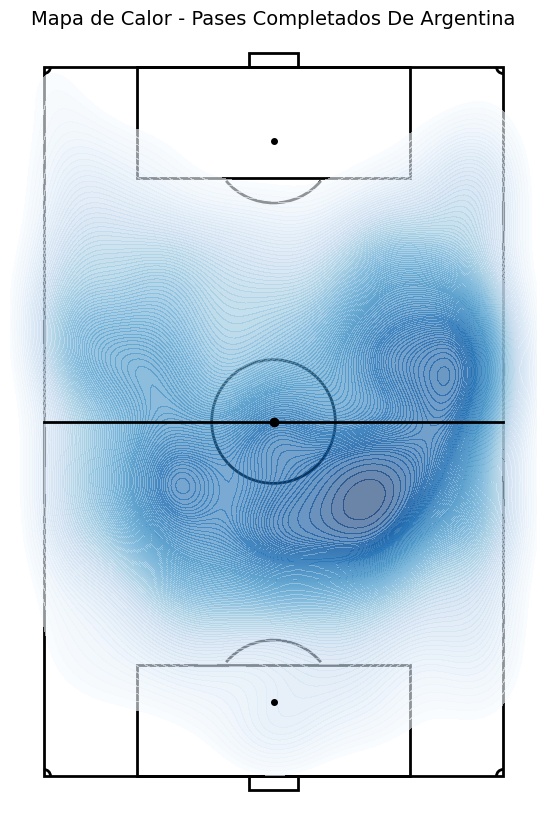

In [ ]:
plot_individual_team_pass_origin_heatmap(team_id=14618, events=events)

In [ ]:
# Función para graficar la posición promedio mas utilizada por los equipos según la tabla Formations

def plot_team_effective_lineup_general(team_id, formations, slot="back_number"):
    """
    Grafica la formación efectiva promedio (general) de un equipo a lo largo del torneo, usando
    los snapshots completos (aquellos instantes en los que el equipo se registra con 11 jugadores).

    Se asume que en la tabla 'formations':
      - La columna 'id' identifica un instante (snapshot) y se repite 11 veces (para cada jugador)
      - Existen las columnas: team_id, id, x, y, y el slot a agrupar (por defecto "back_number").

    El procedimiento es:
      1. Filtrar los registros del equipo.
      2. Conservar únicamente los snapshots (agrupados por 'id') que tengan 11 filas.
      3. Dentro de cada snapshot, agrupar por el slot para obtener la posición promedio para ese instante.
      4. Luego, promediar a lo largo de todos los snapshots por el slot para obtener la formación efectiva.
      5. Graficar los 11 puntos en el campo y etiquetarlos con el valor del slot (back_number).

    Parámetros:
      team_id    : ID del equipo.
      formations : DataFrame con la información de formaciones y las columnas mencionadas.
      slot       : Campo que identifica el “slot” (por defecto "back_number").
    """
    # Filtrar registros para el equipo
    team_data = formations[formations["team_id"] == team_id].copy()
    if team_data.empty:
        print(f"No se encontraron datos para el team_id {team_id}")
        return

    # Filtrar solo los snapshots completos: agrupar por 'id' y conservar los grupos con 11 filas.
    complete_snapshots = team_data.groupby("id").filter(lambda g: len(g) == 11)
    if complete_snapshots.empty:
        print("No se encontraron snapshots completos (con 11 jugadores).")
        return

    # Para cada snapshot (instante), agrupar por el slot elegido y calcular las coordenadas promedio
    snapshot_lineup = complete_snapshots.groupby(["id", slot]).agg({
        "x": "mean",
        "y": "mean"
    }).reset_index()

    # Luego, agrupar a lo largo de todos los snapshots por el slot para obtener la posición efectiva
    effective_lineup = snapshot_lineup.groupby(slot).agg({
        "x": "mean",
        "y": "mean"
    }).reset_index()

    # Si se obtiene más de 11 slots (por cambios, etc.), se seleccionan los 11 con mayor frecuencia
    # (esto sólo se aplica si no se agrupa por main_position)
    if slot != "main_position":
        if len(effective_lineup) > 11:
            counts = snapshot_lineup.groupby(slot).size().reset_index(name="count")
            effective_lineup = pd.merge(effective_lineup, counts, on=slot)
            effective_lineup = effective_lineup.sort_values(by="count", ascending=False).head(11)
            effective_lineup = effective_lineup.sort_values(by=slot)

    # Dibujar el campo (se asume que la función pitch_plot() está definida)
    fig, ax = pitch_plot()

    # Graficar los puntos de la formación promedio
    ax.scatter(effective_lineup["x"], effective_lineup["y"], color="blue", s=200, zorder=3)

    # Anotar cada punto con el valor del slot (back_number) convirtiendo a entero para quitar ".0"
    for _, row in effective_lineup.iterrows():
        etiqueta = f"{int(row[slot])}"
        ax.text(row["x"], row["y"], etiqueta, fontsize=10,
                ha="center", va="center", color="white", zorder=4)

    # Usar team_name en el título si existe, o team_id en otro caso
    team_name = team_data["team_name"].iloc[0] if "team_name" in team_data.columns else f"Team {team_id}"
    ax.set_title(f"Posición Promedio - {team_name}", fontsize=14)

    plt.show()



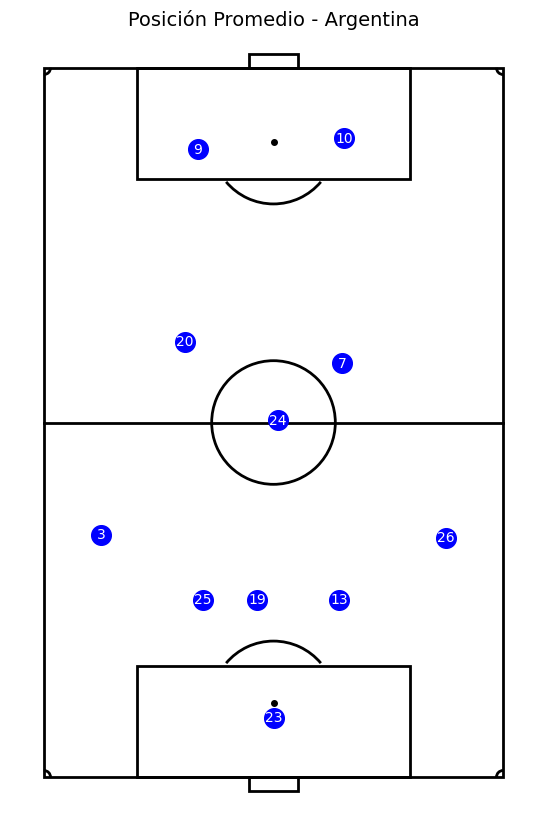

In [ ]:
plot_team_effective_lineup_general(14618, formations, slot="back_number")


In [ ]:
# Definimos la ruta a la carpeta destino en Google Drive
folder_path = "/content/drive/MyDrive/Master en Big Data Deportivo/PFM/Csv trabajados en Python"
print("Archivos se guardarán en:", folder_path)

# Usamos el diccionario de DataFrames que ya tenemos
dataframes = {
    "events": events,
    "formations": formations,
    "lineups": lineups,
    "matches": matches,
    "pass_matrix": pass_matrix,
    "playerstats": playerstats,
    "sequence_data": sequence_data,
    "players": players,
    "teams": teams,
    "teams_stats": teams_stats
}

# Exportar cada DataFrame a un archivo CSV en la carpeta destino
for name, df in dataframes.items():
    file_path = os.path.join(folder_path, f"{name}.csv")
    df.to_csv(file_path, index=False)
    print(f"Exportado {name} a {file_path}")

print("Exportación completa.")